Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


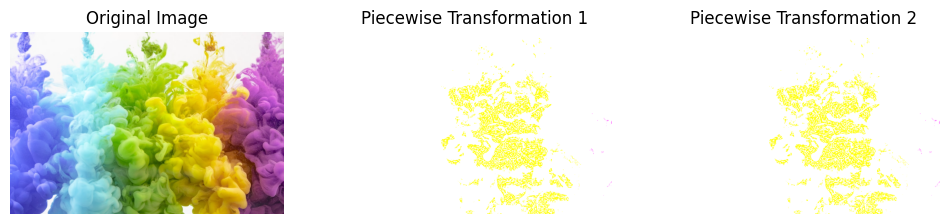

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def piecewise_linear_transform(image):
    points_1 = [(0, 0), (100, 50), (150, 200), (255, 255)]

    points_2 = [(0, 0), (50, 25), (100, 150), (200, 100), (255, 255)]

    lut_1 = np.interp(np.arange(256), np.array(points_1)[:, 0], np.array(points_1)[:, 1])

    lut_2 = np.interp(np.arange(256), np.array(points_2)[:, 0], np.array(points_2)[:, 1])

    transformed_image_1 = cv2.LUT(image, lut_1)
    transformed_image_2 = cv2.LUT(image, lut_2)

    return transformed_image_1, transformed_image_2

image = cv2.imread('F:/Nitheesh/Computer vision/Exercise5/image1.jpg')

transformed_image_1, transformed_image_2 = piecewise_linear_transform(image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(transformed_image_1)
plt.title('Piecewise Transformation 1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(transformed_image_2)
plt.title('Piecewise Transformation 2')
plt.axis('off')

plt.show()


(Text(0.5, 1.0, 'Sliced Image'), ([], []), ([], []))

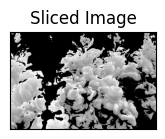

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('F:/Nitheesh/Computer vision/Exercise5/image1.jpg', cv2.IMREAD_GRAYSCALE)
# Stretch Contrast: Enhance darker regions
stretch_transformed = cv2.convertScaleAbs(image, alpha=1.5, beta=0)

# Compress Contrast: Enhance brighter regions
compress_transformed = cv2.convertScaleAbs(image, alpha=0.5, beta=0)
lower_threshold = 100
upper_threshold = 200
# Create a mask to select the desired intensity range
mask = np.zeros_like(image)
mask[(image >= lower_threshold) & (image <= upper_threshold)] = 255
# Apply the mask to the original image
sliced_image = cv2.bitwise_and(image, mask)
plt.subplot(133), plt.imshow(sliced_image, cmap='gray')
plt.title('Sliced Image'), plt.xticks([]), plt.yticks([])


In [ ]:
cv2.imshow('Stretch-Transformed Image', stretch_transformed)
cv2.imshow('Compress-Transformed Image', compress_transformed)
cv2.waitKey(0)
cv2.destroyAllWindows()